# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

#%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customer_orders = pd.read_csv('../data/Wholesale customers data.csv')

In [3]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
customer_orders.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# Your code here:
customer_orders.info()
#não é necessário converter nenhum tipo de dado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
customer_orders.isna().mean()

Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64

In [7]:
customer_orders.isnull().mean()

Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64

In [8]:
(customer_orders == 0).mean()

Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64

In [9]:
customer_orders.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [10]:
customer_orders.corr()[abs(customer_orders.corr())>0.7]
#correlações fortes : ['Grocery', 'Milk'], ['Detergents_Parper','Grocery'] 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Milk,NaN,NaN,NaN,1.000000,0.728335,NaN,NaN,NaN
Grocery,NaN,NaN,NaN,0.728335,1.000000,NaN,0.924641,NaN
Frozen,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Detergents_Paper,NaN,NaN,NaN,NaN,0.924641,NaN,1.000000,NaN
Delicassen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [11]:
df = customer_orders[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

lst_of_index = []
lst_of_qtd_o = []
for col in df.columns:
    
    try:
        upper_cutoff = df[col].mean() + 3*df[col].std()
        lower_cutoff = df[col].mean() - 3*df[col].std()

        #vendo quem são os outliers
        mask1 = (df[col]<lower_cutoff) | (df[col]>upper_cutoff) 
        perc_o = len(df[mask1])/len(df[col])
        qtd_o = len(df[mask1])
        lst_of_qtd_o.append((col,qtd_o))

        #pegando os index dos outliers:
        lst_of_index.extend((col,list(df[mask1].index)))
        

        #vendo quem não é outlier
        mask2 = (df[col]>lower_cutoff) & (df[col]<upper_cutoff)
        perc_n_o = len(df[mask2])/len(df[col])
    except:
        pass



In [12]:
customer_orders.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


In [13]:
customer_orders.iloc[lst_of_index[1]+lst_of_index[3]+lst_of_index[5]+lst_of_index[7]+lst_of_index[9]+lst_of_index[11],:].sort_index()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,2,3,26373,36423,22019,5154,4337,16523
23,2,3,26373,36423,22019,5154,4337,16523
39,1,3,56159,555,902,10002,212,2916
47,2,3,44466,54259,55571,7782,24171,6465
47,2,3,44466,54259,55571,7782,24171,6465
47,2,3,44466,54259,55571,7782,24171,6465
56,2,3,4098,29892,26866,2616,17740,1340
56,2,3,4098,29892,26866,2616,17740,1340
61,2,3,35942,38369,59598,3254,26701,2017
61,2,3,35942,38369,59598,3254,26701,2017


# Your observations here

Meaning of each column

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [14]:
# Your code here


In [15]:
# Your comment here
#for now im jumping this one

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [18]:
# Your import here:
from sklearn.preprocessing import StandardScaler

In [19]:
# Your code here:

#tem que ser df porque os valores das colunas Channel e Região são 'categóricas' 

#X_std é igual a X 'estandardizado'
X_std = StandardScaler().fit_transform(df)


In [20]:
X_std_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
X_std_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [21]:
customers_scale = customer_orders[['Channel','Region']]

In [22]:
customers_scale = pd.concat([customers_scale,X_std_df],axis =1)
customers_scale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,1,3,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,1,3,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,2,3,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,1,3,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


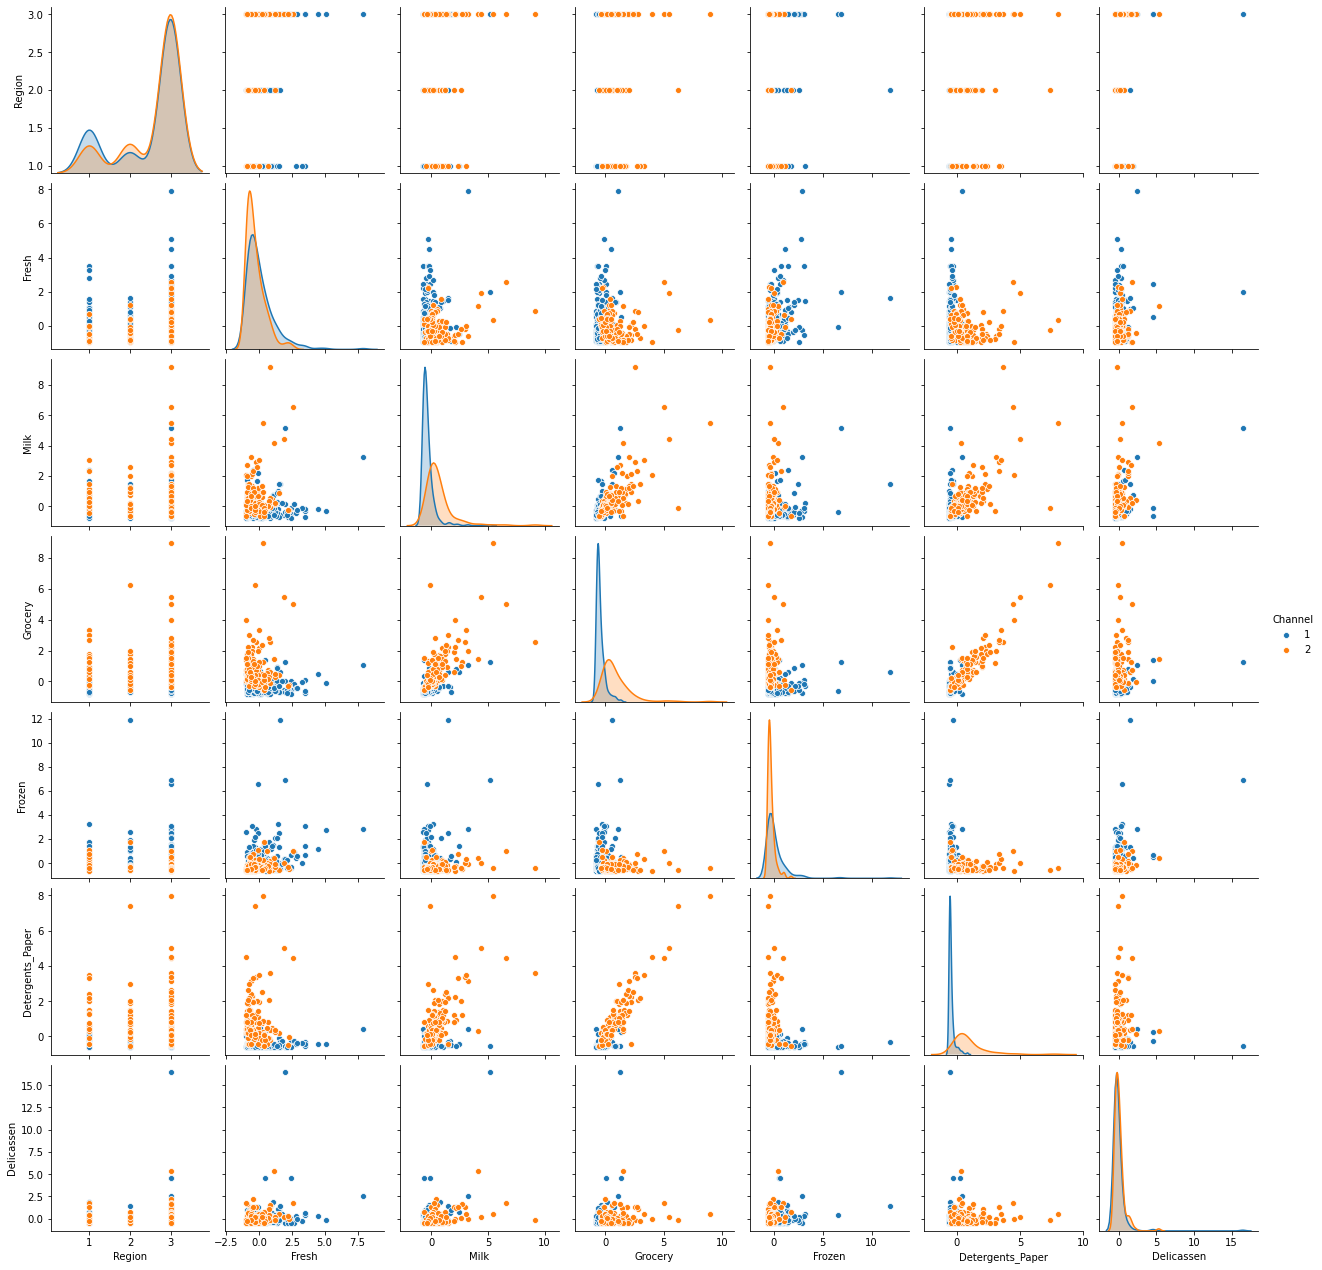

In [23]:
sns.pairplot(data = customers_scale,hue='Channel')

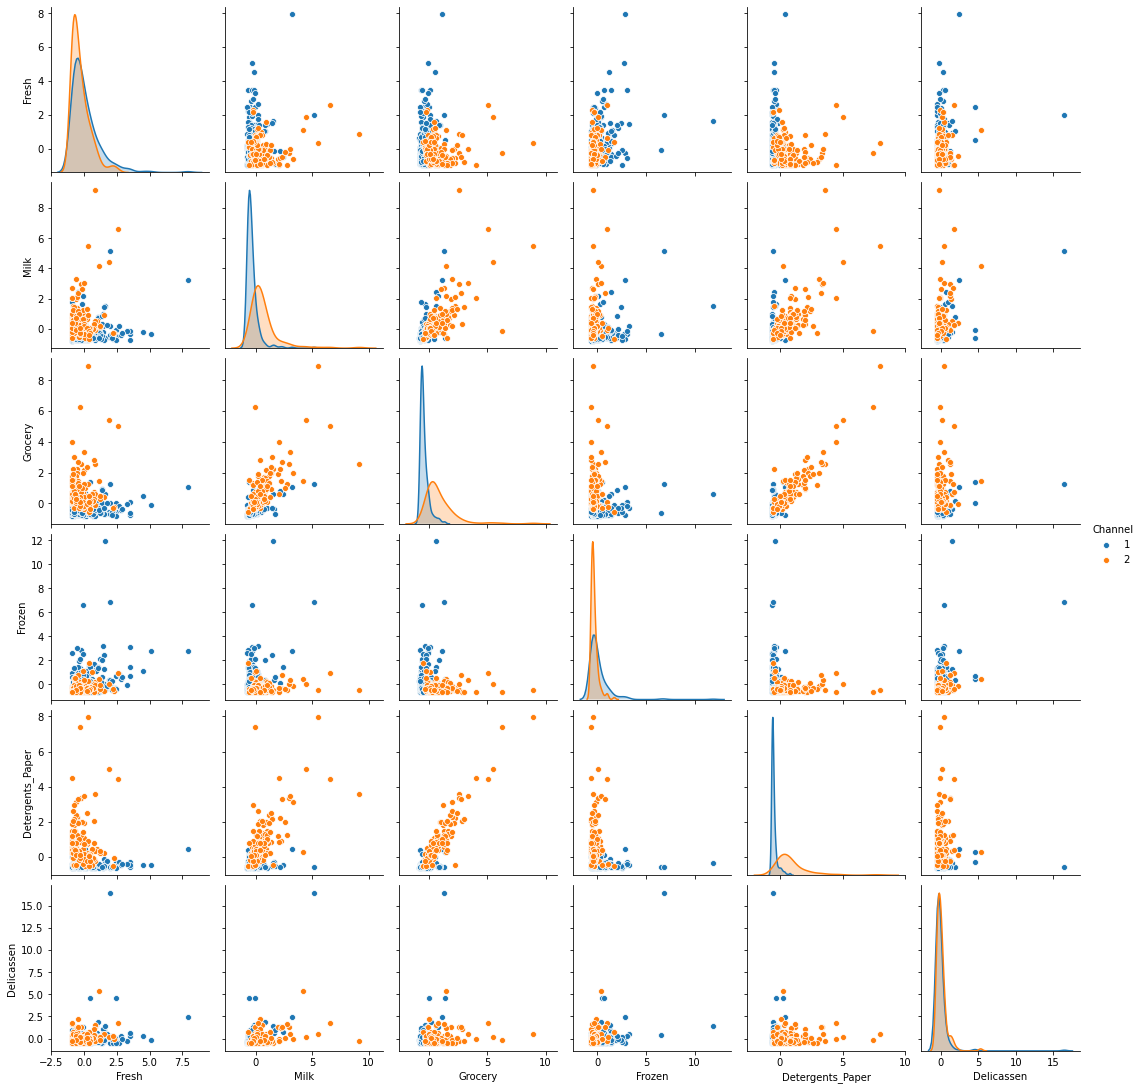

In [24]:
sns.pairplot(data = customers_scale[['Channel','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']],hue='Channel')

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [25]:
from sklearn.cluster import KMeans

In [26]:
# Your code here:
X = customers_scale

#iniate k means
kmeans = KMeans(4)

#fitting the scaled data
kmeans.fit(X)

#data após o fit (cluster number assigned to each data record ou seja, em qual cluster cada linha ficou)
kmeans.labels_
kmeans.predict(X) #é a mesma coisa porque no caso do cluster, a previsão é dos grupos 


#nova coluna com os clusters
customers_scale['labels'] = kmeans.labels_

Count the values in `labels`.

In [27]:
# Your code here:
customers_scale['labels'].value_counts()

1    306
0    121
3     12
2      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
customers_scale.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0


In [58]:
# Your code here

X1 = customers_scale[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

db = DBSCAN(eps=0.5, min_samples=3)

db.fit(X1)

customers_scale['labels_DBSCAN'] = db.labels_

#-1 outlier, resto é categoria

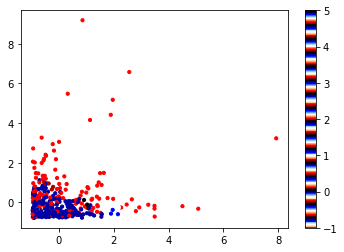

In [48]:
plt.scatter(X1.loc[:,'Fresh'], X1.loc[:,'Milk'], c=labels,s=10, cmap='flag');
plt.colorbar()

Count the values in `labels_DBSCAN`.

In [59]:
# Your code here
customers_scale.labels_DBSCAN.value_counts()

 0    280
-1    141
 1      6
 2      4
 5      3
 4      3
 3      3
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [34]:
from sklearn.cluster import DBSCAN

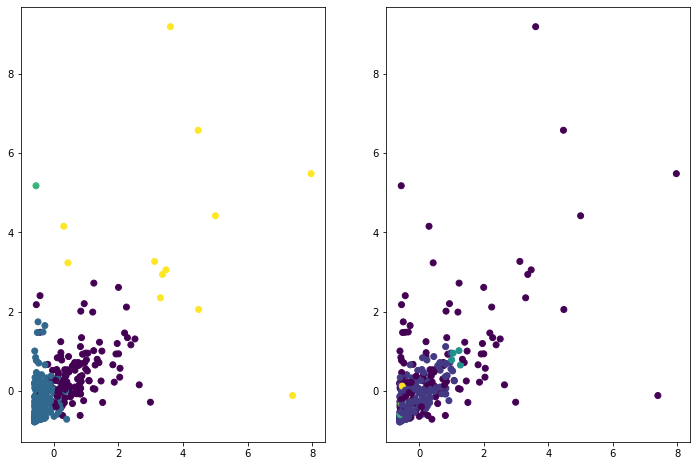

In [64]:
# Your code here:
X = customers_scale[['Detergents_Paper']]
y = customers_scale.Milk

db = DBSCAN(eps=0.5, min_samples=3)
db.fit(X)
labels_DBSCAN1 = db.fit_predict(X)
customers_scale['labels_DBSCAN_1'] = labels_DBSCAN1

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
ax1.scatter(X, y, c=customers_scale['labels'], cmap='viridis')

ax2.scatter(X, y, c=customers_scale['labels_DBSCAN'], cmap='viridis')

plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

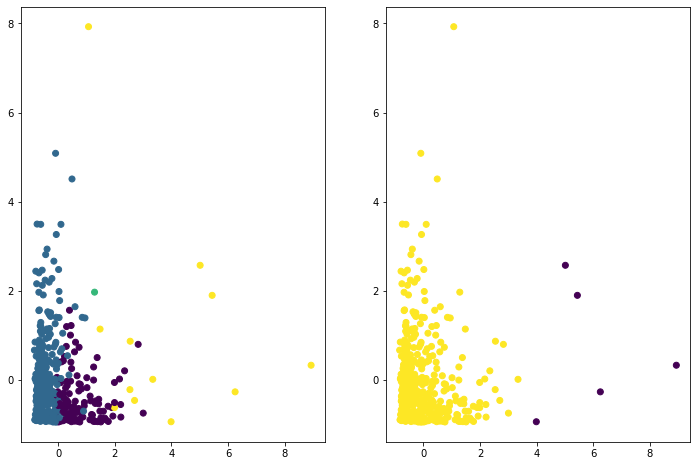

In [65]:
# Your code here:
X = customers_scale[['Grocery']]
y = customers_scale.Fresh

db = DBSCAN(eps=0.5, min_samples=3)
db.fit(X)
labels_DBSCAN2 = db.fit_predict(X)

customers_scale['labels_DBSCAN_2'] = labels_DBSCAN2


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
ax1.scatter(X, y, c=customers_scale['labels'], cmap='viridis')

ax2.scatter(X, y, c=customers_scale['labels_DBSCAN_2'], cmap='viridis')

plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

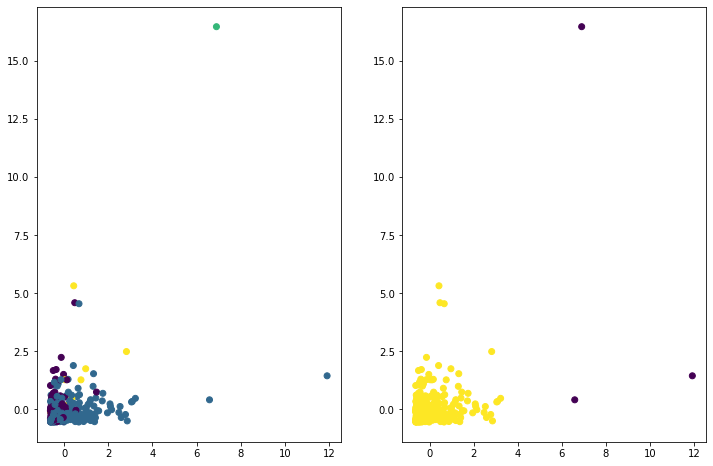

In [66]:
# Your code here:
# Your code here:
X = customers_scale[['Frozen']]
y = customers_scale.Delicassen

db = DBSCAN(eps=0.5, min_samples=3)
db.fit(X)
labels_DBSCAN3 = db.fit_predict(X)
customers_scale['labels_DBSCAN_3'] = labels_DBSCAN3


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
ax1.scatter(X, y, c=customers_scale['labels'], cmap='viridis')

ax2.scatter(X, y, c=customers_scale['labels_DBSCAN_3'], cmap='viridis')

plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [67]:
# Your code here:
customers_scale.groupby(['labels']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN_1,labels_DBSCAN_2,labels_DBSCAN_3,labels_DBSCAN
labels,,,,,,,,,,,,
0,1.909091,2.603306,-0.419222,0.505528,0.757914,-0.342658,0.747875,0.056479,0.000000,0.000000,0.000000,-0.454545
1,1.068627,2.516340,0.119462,-0.369119,-0.451984,0.102444,-0.447252,-0.118184,0.000000,0.000000,-0.006536,-0.075163
2,1.000000,3.000000,1.966817,5.175503,1.287217,6.900600,-0.554862,16.478447,0.000000,0.000000,-1.000000,-1.000000
3,1.916667,2.583333,1.016980,3.883845,3.776026,0.267776,3.910100,1.070993,-0.416667,-0.416667,0.000000,-1.000000


In [68]:
customers_scale.groupby(['labels_DBSCAN']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN_1,labels_DBSCAN_2,labels_DBSCAN_3
labels_DBSCAN,,,,,,,,,,,,
-1,1.531915,2.503546,0.354304,0.656648,0.704748,0.472481,0.593136,0.409543,0.730496,-0.035461,-0.035461,-0.021277
0,1.221429,2.535714,-0.248582,-0.322940,-0.339245,-0.241969,-0.287237,-0.210380,0.807143,0.000000,0.000000,0.000000
1,1.166667,3.000000,2.307593,-0.536436,-0.560357,-0.367267,-0.513917,-0.176922,1.000000,0.000000,0.000000,0.000000
2,2.000000,2.750000,-0.339651,0.855330,0.999169,-0.116398,1.142012,-0.234432,0.000000,0.000000,0.000000,0.000000
3,1.000000,3.000000,2.007821,-0.509623,-0.654415,0.335674,-0.548843,0.143939,1.000000,0.000000,0.000000,0.000000
4,1.000000,3.000000,-0.636296,-0.187276,-0.561814,-0.410092,-0.534914,1.076525,1.000000,0.000000,0.000000,0.000000
5,1.000000,3.000000,1.014915,-0.092051,-0.455554,1.341348,-0.479690,-0.167041,1.000000,0.000000,0.000000,0.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here
print("apparently kmeans have a better division of the clusters than dbScan")

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here